# Project 4, APS1070 Winter 2022
#### **Linear Regression -  14 points**
**Deadline: April 1st, 23:00**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Please fill out the following:


*   Your **name**: 
*   Your **student number**: 



### How to submit **(HTML [This notebook] + IPYNB + GitHub [Part 7])**

1. Download your notebook: `File -> Download .ipynb`

2. Click on the Files icon on the far left menu of Colab

3. Select & upload your `.ipynb` file you just downloaded, and then obtain its path (right click) (you might need to hit the Refresh button before your file shows up)


4. execute the following in a Colab cell:
```
%%shell
jupyter nbconvert --to html /PATH/TO/YOUR/NOTEBOOKFILE.ipynb
```

5. An HTML version of your notebook will appear in the files, so you can download it.

6. Submit **both** <font color='red'>`HTML` and `IPYNB`</font>  files for this notebook on Quercus for grading.

7. Make sure you compeleted the last part on <font color='red'>**GitHub**</font> and added your link to the last cell here. The teaching team will view and grade your part 7 on GitHub.



Ref: https://stackoverflow.com/a/64487858 



## Part 1 - Getting Started [1 marks]

Ailerons are small hinged sections on the outboard portion of a wing used to control the roll of an airplane. In this project, we are going to design a controller to manage the ailerons of an aircraft based on supervised learning.

![Aileron](https://www.eecg.utoronto.ca/~hadizade/APS1070/p3Ar.jpg)




The following dataset contains 13750 instances, where each instance is a set of 40 features describing the airplane's status. Our goal is to use these features to predict the `Goal` column, which is a command that our controller should issue. We will make our predictions by implementing linear regression.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import scipy
from scipy.linalg import inv
from sklearn.metrics import mean_squared_error
import time
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/aps1070-2019/datasets/master/F16L.csv" , skipinitialspace=True)
df

,inputs ClimbRate,Sgz,P,Q,CurPitch,CurRoll,AbsRoll,DiffClb,DiffRollRate,DiffDiffClb,...,DiffSeTime8,DiffSeTime9,DiffSeTime10,DiffSeTime11,DiffSeTime12,DiffSeTime13,DiffSeTime14,Alpha,Se,Goal
0,-17,-6,-0.03,0.14,0.59,-0.5,-11,-9,0.015,-0.2,...,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.6,0.021,-0.0008
1,-791,15,-0.28,-0.34,1.11,0.9,-10,27,-0.002,4.7,...,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.4,0.013,-0.0009
2,-46,48,-0.42,0.07,0.57,0.6,-5,-8,-0.008,0.0,...,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.5,0.019,-0.0005
3,496,-5,-0.21,-0.04,0.03,-0.5,-7,6,-0.002,-0.1,...,0.0,0.000,0.0,0.001,0.0,0.001,0.0,0.5,0.017,-0.0005
4,-124,16,-0.02,0.05,0.61,-0.2,-9,-3,0.000,0.0,...,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.5,0.018,-0.0006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13745,-53,-13,-0.07,0.02,0.58,-2.3,-15,12,0.022,-0.8,...,0.0,0.000,0.0,0.000,0.0,-0.001,0.0,0.5,0.019,-0.0007
13746,1,4,-0.11,-0.07,0.47,0.8,-5,8,-0.003,-0.2,...,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.5,0.016,-0.0004
13747,425,-14,0.40,0.07,0.41,-2.1,-16,12,0.031,-0.7,...,0.0,0.001,0.0,0.000,0.0,0.001,0.0,0.9,0.032,-0.0015
13748,102,-10,-0.19,0.08,1.30,0.5,-10,-3,-0.003,-0.2,...,0.0,0.000,0.0,0.000,0.0,0.000,0.0,1.4,0.051,-0.0015


Here are the steps to complete this portion:

1. Print the dataframe.
2. Prepare your dataset as follows: **[0.5]**
  *   Using `train_test_split` from Sklearn, split the dataset into training, validation, and test sets ($70\%$ training, $15\%$ validation, and $15\%$ test). When splitting, set `random_state=1`.
  *   Standardize the data using `StandardScaler` from sklearn. 
  *   Insert the first column of all $1$s in the training, validation, and test set.
 
3. Explain the difference between epoch and iteration in the Gradient descent algorithm (SGD/mini-batch)? **[0.5]**

In [3]:
### YOUR CODE HERE ###
print(df)

X = df.drop('Goal', axis='columns').values
y = df['Goal'].values.reshape(-1,1)

# Standardize the data using StandardScaler from sklearn.
scaler = StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)

# Insert the first column of all  1 s in the training, validation, and test set.
b = np.ones(len(X)).reshape(-1,1)
X_std = np.concatenate((b,X_std),axis=1)

# 70%  training,  15%  validation, and  15%  test
# Split testing 15%, validation+training = 85%
X_train, X_test, y_train, y_test = train_test_split(X_std, 
                                                    y, 
                                                    test_size = 0.15,
                                                    random_state=1)

# Split validation = 0.15/0.85, training = 0.70/0.85
X_train, X_val, y_train, y_val = train_test_split(X_train, 
                                                y_train, 
                                                test_size = 0.15/0.85,
                                                random_state=1)


       inputs ClimbRate  Sgz     P     Q  CurPitch  CurRoll  AbsRoll  DiffClb  \
0                   -17   -6 -0.03  0.14      0.59     -0.5      -11       -9   
1                  -791   15 -0.28 -0.34      1.11      0.9      -10       27   
2                   -46   48 -0.42  0.07      0.57      0.6       -5       -8   
3                   496   -5 -0.21 -0.04      0.03     -0.5       -7        6   
4                  -124   16 -0.02  0.05      0.61     -0.2       -9       -3   
...                 ...  ...   ...   ...       ...      ...      ...      ...   
13745               -53  -13 -0.07  0.02      0.58     -2.3      -15       12   
13746                 1    4 -0.11 -0.07      0.47      0.8       -5        8   
13747               425  -14  0.40  0.07      0.41     -2.1      -16       12   
13748               102  -10 -0.19  0.08      1.30      0.5      -10       -3   
13749              -165   52  0.08  0.42      1.07     -1.6      -22      -15   

       DiffRollRate  DiffDi

In [4]:
# Explain the difference between epoch and iteration in the Gradient descent algorithm (SGD/mini-batch)? [0.5]
'''
Epoch means iterate the whole dataset one times. Mini_batch divided the dataset to servel parts to realize that making
serval iterations in one epoch. For example, if the number of whole dataset is 500, and we have 10 mini batch, thus 
each batch will make an iteration and there will be 10 iteration after ergodicing the whole dataset.  Thus, in this case,
10 iterations will make an epoch.
'''

'\nEpoch means iterate the whole dataset one times. Mini_batch divided the dataset to servel parts to realize that making\nserval iterations in one epoch. For example, if the number of whole dataset is 500, and we have 10 mini batch, thus \neach batch will make an iteration and there will be 10 iteration after ergodicing the whole dataset.  Thus, in this case,\n10 iterations will make an epoch.\n'

## Part 2 - Linear Regression Using Direct Solution [1 marks]

Implement the direct solution of the linear regression problem on the training set. **[0.5]**

**Note:** You should use **``scipy.linalg.inv``** to perform the matrix inversion, as ``numpy.linalg.inv`` may cause numerical issues.

Report the root-mean-square error (RMSE) for both the training and validation sets. **[0.5]**

You may use `mean_squared_error` from Sklearn for computing the RMSE.

In [5]:
### YOUR CODE HERE ###

# analytical solution
W = np.dot(inv(np.dot(X_train.T, X_train)), np.dot(X_train.T, y_train))

 # prediction
yPred_train = np.dot(X_train, W)
yPred_val = np.dot(X_val, W)

def rmse(yPred, y):
    return np.sqrt(mean_squared_error(yPred, y))

# Training sets
RMSE_train = rmse(yPred_train, y_train)
print(f'The root-mean-square error (RMSE) for training sets is {RMSE_train}.')

# Validation sets
RMSE_val = rmse(yPred_val, y_val)
print(f'The root-mean-square error (RMSE) for validation sets is {RMSE_val}.')

The root-mean-square error (RMSE) for training sets is 0.0004975636347263266.
The root-mean-square error (RMSE) for validation sets is 0.0004817462750706393.


In [6]:
W

array([[-8.72355626e-04],
       [ 6.17820955e-05],
       [ 5.99900620e-06],
       [-1.28880872e-04],
       [-3.48089148e-07],
       [ 8.04499400e-05],
       [-8.34071915e-05],
       [ 2.39397494e-04],
       [-3.48913661e-05],
       [ 3.28607940e-05],
       [ 1.24747865e-06],
       [ 1.07337092e-04],
       [ 2.03403777e-02],
       [-2.00659683e-02],
       [-1.18517619e-03],
       [ 9.45691454e-04],
       [ 1.94171029e-04],
       [ 1.99873420e-04],
       [ 4.43578746e-03],
       [-4.54551061e-03],
       [ 2.79879548e-04],
       [-4.42846425e-04],
       [-2.27344570e-04],
       [ 4.10818530e-04],
       [ 1.18896536e-03],
       [-1.16107729e-05],
       [-3.40578725e-05],
       [-4.48144871e-06],
       [ 3.68183770e-06],
       [ 8.68767024e-07],
       [ 6.24337880e-06],
       [-8.55283959e-06],
       [-6.75648634e-06],
       [-9.02400088e-06],
       [-2.56266779e-06],
       [ 3.15062218e-06],
       [ 1.24961513e-07],
       [-5.76623444e-06],
       [-5.0

## Part 3 - Full Batch Gradient Descent [2 marks]

We will now implement a "full batch" gradient descent algorithm and record the training time for our model. Recall that the full batch gradient descent is,
 $$w_t = w_{t-1} - \alpha~g_t$$ where $\alpha$ is the learning rate and $g_t$ is your gradient, computed on the entire data. 

Here are the steps for this part:

* Implement gradient descent for linear regression using a fixed learning rate of $\alpha= 0.01$, and iterate until your model's **validation** RMSE converges. 

  We consider the gradient descent as having converged when RMSE on the validation set using gradient descent satisfies:

  $$ RMSE_\text{GD} \leq 1.001 \times RMSE_\text{Direct Solution}$$

  where $RMSE_\text{Direct Solution}$ is the RMSE on the validation set using the direct solution that you have calculated in the previous part. 

  We refer to the quantity $RMSE_\text{Direct Solution}\times 1.001$ as the convergence threshold (CT).

*  Record the training time (from the first iteration until convergence) using the `time.time()` function. Be sure to compute the gradients yourself! Take a look at the code provided in the tutorial. **[0.5]**

* Plot the training RMSE and the validation RMSE vs. epoch on the same figure.  **[0.5]**

* Comment on overfitting/underfitting by observing the training and validation RMSE **[1]**

**Hint**: Initialize your weights with small random numbers (<$0.001$)

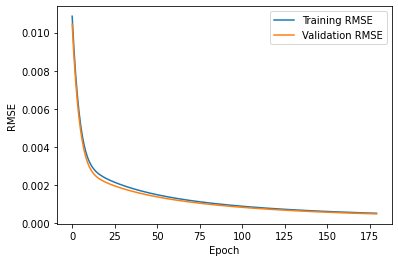

--- Total Training Time: 0.1663069725036621 (s) ---


In [7]:
import time
start_time = time.time() ## Records current time

## GD Script -- Sample code in tutorial! ##

w = (np.random.random(X_train.shape[1]).reshape(1,-1))/1000  ### Inital weights
lr = 0.01  ### Learning rate
rmse_train_array=[]
rmse_val_array=[]

RMSE_val_GD = rmse(np.dot(X_val,w.T).reshape (-1,1),y_val)

while RMSE_val_GD > 1.001*RMSE_val: 
    
    # Training dataset
    yPred_train = np.dot(X_train,w.T).reshape (-1,1)
    rmse_train_array.append(rmse(yPred_train,y_train))
    
    # Validation dataset
    yPred_val = np.dot(X_val,w.T).reshape (-1,1)
    RMSE_val_GD = rmse(yPred_val,y_val)
    rmse_val_array.append(RMSE_val_GD)
    
    gradient = (1/len(yPred_train) * np.dot(X_train.T, yPred_train-y_train)).reshape(1,-1)
    w = w - lr * gradient ### weight update
    

plt.plot(rmse_train_array,label = 'Training RMSE')
plt.plot(rmse_val_array,label = 'Validation RMSE')
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.legend()
plt.show()

print("--- Total Training Time: %s (s) ---" % (time.time() - start_time))

## Part 4 - Mini-batch and Stochastic Gradient Descent [4 marks]

Write a function that performs mini-batch gradient descent until the convergence threshold (CT) is reached. **[1]**

The inputs of that function are: 
  * Input data (training/validation), Batch size, Learning Rate, Convergence Threshold (CT)

Your function will return the following arrays: 
 * The final weights after training.
 * The training RMSE at each epoch.
 * The validation RMSE at each epoch.
 * An array that has the elapsed time from the start of the training process to the end of each epoch (e.g., if each epoch takes exactly 2 seconds, the array would look like: [2 4 6 8 ...]).

Notes: 
* For certain batch sizes, GD might not converge to a solution. For that reason, you need to check the RMSE of the validation/training set at each epoch, and if it's getting larger and larger, you should stop the training for that case (the design is up to you!).
* CT will help you to know when your model is converged. 
* **Important: after each epoch, you need to shuffle the entire training set.** This ensures that new mini-batches are selected for every epoch. Hint: use `np.random.permutation`. 

Let's now use the function to investigate the effect of batch size on convergence. When the batch size is 1, we call that stochastic gradient descent. When the batch size equals the # of training data, it is full-batch (i.e., all data points are used at every iteration). Anywhere in between is mini-batch (we use some of the data).
  * Sweep different values for the mini-batch size (at least 5 values that **converge**), each time using a learning rate of $\alpha= 0.01$. **Hint: Try batch sizes that are powers of two (e.g., 2,4,8,16,32,64,128...).** These batch sizes fit better on the hardware and may achieve higher performance.  **[0.5]**

Provide the following $3$ plots:
  1.  Plot training and validation RMSE vs. **epoch** for all the **converging** batch sizes (some batch sizes might not converge) in a figure. The X-axis is Epoch # and the Y-axis is RMSE. **[0.5]**
  2. Plot training and validation RMSE vs. **time** for all the **converging** batch sizes in a figure. The X-axis is Time, and the Y-axis is RMSE. **[0.5]**
  3. Plot Total training time (y-axis) vs. Batch size (x-axis). **[0.5]**

Describe your findings, including the main takeaways from each of your plots. **[1]**

In [8]:
### YOUR CODE HERE ###

In [9]:
def mini_batch_gradient(X_train,y_train,X_val,y_val,Batch_size,Learning_Rate,CT):
    
    w = (np.random.random(X_train.shape[1]).reshape(1,-1))/100  ### Inital weights
    RMSE_val_GD = rmse(np.dot(X_val,w.T).reshape (-1,1),y_val)  ### Inital RMSE_val
    
    rmse_train_array = []
    rmse_val_array = []
    time_list = []
    
    iteration = 0
    Time=0 
    
    converge = 1
    
    while RMSE_val_GD > 1.001*CT:
        
        start_time = time.time()
        
        # shuffle the training dataset
        data_train = np.hstack((X_train,y_train))
        data_train = np.random.permutation(data_train)
        X_train_shuffle = data_train[:,:-1]
        y_train_shuffle = data_train[:,-1].reshape(-1,1)
        # shuffle the validation dataset
        data_val = np.hstack((X_val,y_val))
        data_train = np.random.permutation(data_train)
        X_val_shuffle = data_val[:,:-1]
        y_val_shuffle = data_val[:,-1].reshape(-1,1)
        
        for i in range(0,len(X_train),Batch_size):
            
            iteration = iteration + 1
            
            # Training dataset
            yPred_train = np.dot(X_train_shuffle[i:i+Batch_size,:],w.T).reshape (-1,1)
            # RMSE_train = rmse(yPred_train,y_train_shuffle[i:i+Batch_size,:])
            #rmse_train.append(RMSE_train)
            
            gradient = (1/len(yPred_train) * np.dot(X_train_shuffle[i:i+Batch_size,:].T, yPred_train - y_train_shuffle[i:i+Batch_size,:])).reshape(1,-1)
            w = w - Learning_Rate * gradient ### weight update
         
        # training 
        #rmse_train_GD  = rmse_train[-1]
        #rmse_train_array.append(rmse_train_GD)
        yPred_train = np.dot(X_train_shuffle,w.T).reshape (-1,1)
        RMSE_train_GD = rmse(yPred_train,y_train_shuffle)
        rmse_train_array.append(RMSE_train_GD)
            
        # validation
        yPred_val = np.dot(X_val_shuffle,w.T).reshape (-1,1)
        RMSE_val_GD = rmse(yPred_val,y_val_shuffle)
        rmse_val_array.append(RMSE_val_GD)
        
        Time=Time+(time.time()-start_time)
        time_list.append(Time)
        
        if iteration > 20000:
            return 0,0,0,0,0
    
    
    return  converge, w,rmse_train_array,rmse_val_array,time_list

Sweep different values for the mini-batch size (at least 5 values that converge), each time using a learning rate of  𝛼=0.01 . Hint: Try batch sizes that are powers of two (e.g., 2,4,8,16,32,64,128...). These batch sizes fit better on the hardware and may achieve higher performance. [0.5]

In [10]:
# Let batch sizes that are powers of two (e.g., 2,4,8,16,32,64,128...).

CT = 1.001*RMSE_val
Learning_Rate = 0.01

batch_sizes_list = [2,4,8,16,32,64,128,256,512,1024,2048]
converge_list = []
for i in batch_sizes_list:
    converge, w,rmse_train_array,rmse_val_array,time_list = mini_batch_gradient(X_train,y_train,X_val,y_val,i,0.01,CT)
    converge_list.append(converge)
    
obj_1 = pd.Series(converge_list, index = ['2','4','8','16','32','64','128','256','512','1024','2048'])
obj_1 ## return 0 means not converge and 1 represents converge

2       0
4       0
8       0
16      0
32      0
64      0
128     1
256     1
512     1
1024    1
2048    1
dtype: int64


1. Plot training and validation RMSE vs. epoch for all the converging batch sizes (some batch sizes might not converge) in a figure. The X-axis is Epoch # and the Y-axis is RMSE. [0.5]

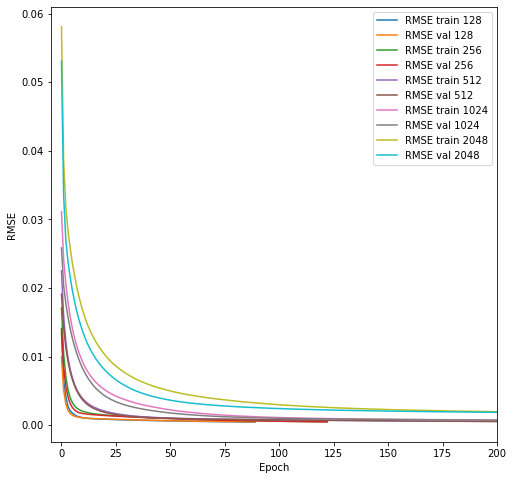

In [11]:
B_list=[128,256,512,1024,2048]
w_list=[]
rmse_train_list=[]
rmse_val_list=[]
timelist=[]
RMSE_ds= rmse(yPred_val,y_val)
CT= 1.001*RMSE_val

for i in range(len(B_list)):
    converge, w,rmse_train_array,rmse_val_array,time_list = mini_batch_gradient(X_train,y_train,X_val,y_val,B_list[i],0.01,CT)
    w_list.append(w)
    rmse_train_list.append(rmse_train_array)
    rmse_val_list.append(rmse_val_array)
    timelist.append(time_list)

plt.figure(figsize=(8,8)) 
for i in range(len(B_list)):
    plt.plot(rmse_train_list[i],label=('RMSE train %d'%B_list[i]))
    plt.plot(rmse_val_list[i],label=('RMSE val %d'%B_list[i]))
plt.xlim([-5,200])
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.legend()

    

2. Plot training and validation RMSE vs. time for all the converging batch sizes in a figure. The X-axis is Time, and the Y-axis is RMSE. [0.5]

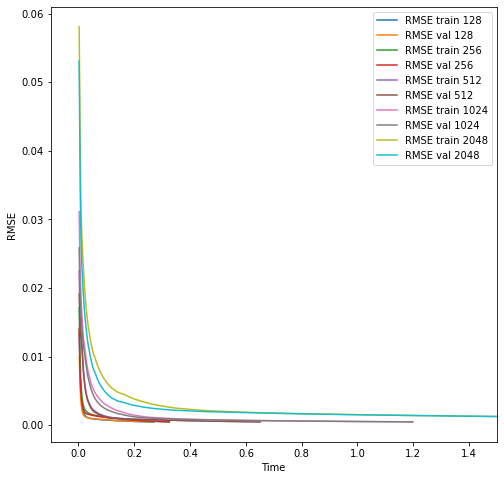

In [12]:
plt.figure(figsize=(8,8)) 
for i in range(len(B_list)):
    plt.plot(timelist[i],rmse_train_list[i],label=('RMSE train %d'%B_list[i]))
    plt.plot(timelist[i],rmse_val_list[i],label=('RMSE val %d'%B_list[i]))
plt.xlabel('Time')
plt.ylabel('RMSE')
plt.xlim([-0.1,1.5])
plt.legend()


3. Plot Total training time (y-axis) vs. Batch size (x-axis). [0.5]

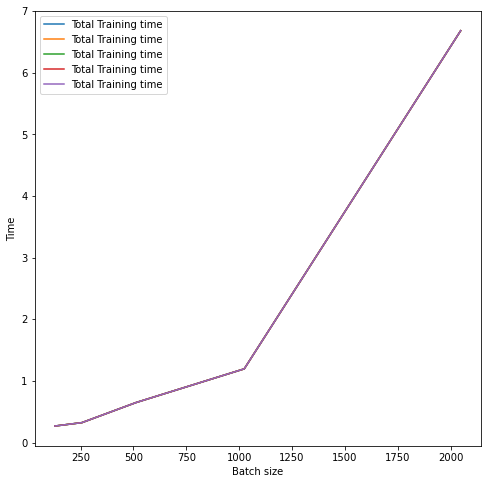

In [13]:
Training_time = [timelist[0][-1],timelist[1][-1],timelist[2][-1],timelist[3][-1],timelist[4][-1]]
plt.figure(figsize=(8,8)) 
for i in range(len(B_list)):
    plt.plot(B_list,Training_time, label = ('Total Training time'))
    
plt.xlabel('Batch size')
plt.ylabel('Time')
plt.legend()

In [14]:
## Describe your findings, including the main takeaways from each of your plots. [1]
'''

1. The large batch size will take more epoches to achieve the same size of RMSE compared with the model with loer
batch size.
2. The larger size batch size will take more time to converge to the same size of RMSE comparing to the small batch size.
3. When the batch size is small than 64, the model will not be converged in most time, if the batchsize is 64, sometime 
the model will converge. And the larger batch size, the longer time will take to process.
'''

'\n\n1. The large batch size will take more epoches to achieve the same size of RMSE compared with the model with loer\nbatch size.\n2. The larger size batch size will take more time to converge to the same size of RMSE comparing to the small batch size.\n3. When the batch size is small than 64, the model will not be converged in most time, if the batchsize is 64, sometime \nthe model will converge. And the larger batch size, the longer time will take to process.\n'

## Part 5 - Gradient Descent Learning Rate [2 marks]
Use the function that you designed in Part 4 to investigate the effect of learning rate on convergence.

1. Pick 3 batchsize that are not converging with a learning rate of $\alpha= 0.01$ (last part) and try to find a learning rate that results in convergence for each batchsize. Report your findings in a table. Mention batch size, learning rate, and training and validation RMSE. **[0.5]**

2. Select the best batchsize based on Part 4's fastest convergence time and sweep the learning rate (at least 10 values, all should converge) while applying Mini-batch GD. 
  
  * Plot the training and validation RMSE vs. **epoch** (x-axis) for all the learning rates that you tried in a figure. **[0.5]**
  * Plot the training and validation RMSE vs. **time** (x-axis) for all the learning rates that you tried in a figure. **[0.5]**
  * Describe your findings, including the main takeaways from each of your plots. **[0.5]**

1. Pick 3 batchsize that are not converging with a learning rate of  𝛼=0.01  (last part) and try to find a learning rate that results in convergence for each batchsize. Report your findings in a table. Mention batch size, learning rate, and training and validation RMSE. [0.5]

In [15]:
### YOUR CODE HERE ###

2.1 Plot the training and validation RMSE vs. epoch (x-axis) for all the learning rates that you tried in a figure. [0.5]

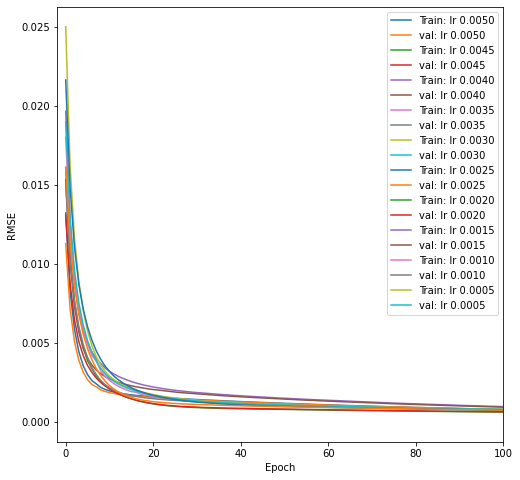

In [30]:
# Plotting the training and validation RMSE vs Epoch
learning_rate=np.linspace(0.005,0.0005,10)
B=128
w_list=[]
RMSE_train_list=[]
RMSE_val_list=[]
Time_list=[]

for i in range(len(learning_rate)):
    
    converge, w,rmse_train_array,rmse_val_array,time_list = mini_batch_gradient(X_train,y_train,X_val,y_val,B,learning_rate[i],CT)
    
    w_list.append(w)
    RMSE_train_list.append(rmse_train_array)
    RMSE_val_list.append(rmse_val_array)
    Time_list.append(time_list)
    
plt.figure(figsize=(8,8)) 
for i in range(len(learning_rate)):
    plt.plot(RMSE_train_list[i],label='Train: lr %0.4f' %(learning_rate[i]))
    plt.plot(RMSE_val_list[i],label='val: lr %0.4f'%(learning_rate[i]))
    
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.xlim([-2,100])
plt.legend()

2. Plot the training and validation RMSE vs. time (x-axis) for all the learning rates that you tried in a figure. [0.5]

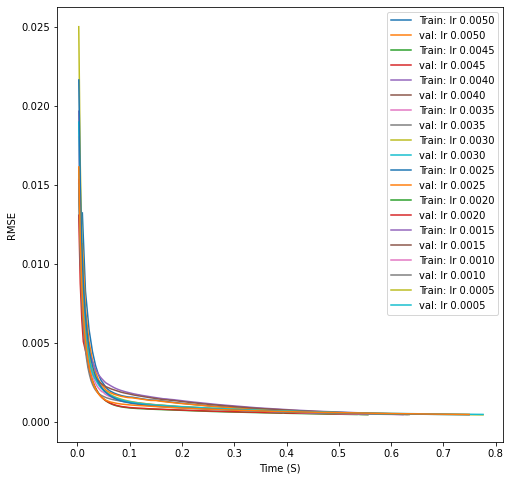

In [31]:
plt.figure(figsize=(8,8))
for i in range(len(learning_rate)): 
    plt.plot(Time_list[i],RMSE_train_list[i],label='Train: lr %0.4f' %(learning_rate[i]))
    plt.plot(Time_list[i],RMSE_val_list[i],label='val: lr %0.4f'%(learning_rate[i]))
plt.xlabel('Time (S)')
plt.ylabel('RMSE')
plt.legend()

3. Describe your findings, including the main takeaways from each of your plots. [0.5]

In [18]:
'''
1. The lower learining rate will take more time to achieve the same size of RMSE compared with the model with higher
learning rate.
2. The lower learining rate will take more epochs to achieve the same size of RMSE compared with the model with higher
learning rate.
'''

'\n1. The lower learining rate will take more time to achieve the same size of RMSE compared with the model with higher\nlearning rate.\n2. The lower learining rate will take more epochs to achieve the same size of RMSE compared with the model with higher\nlearning rate.\n'

## Part 6 - Finalizing a model [1 marks]
Based on your findings from the previous parts, pick a model (or combination of model settings) that you think would work best for our dataset and evaluate it on the test set. 

Briefly describe your model selections/settings. **[0.5]** 

Summarize the performance of your model for the task of managing ailerons of an aircraft. **[0.5]** 

the RMSE for the trainning set is equal to 0.00048781268123503714
the RMSE for the testing set is equal to  0.00048239435689614


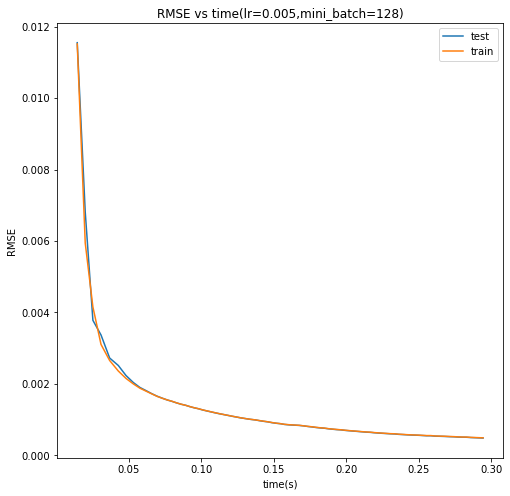

In [27]:
### YOUR CODE HERE ###

converge, w,rmse_train_array,rmse_test_array,time_list = mini_batch_gradient(X_train,y_train,X_test,y_test,128,0.01,CT)
plt.figure(figsize=(8,8))
plt.plot(time_list,rmse_test_array,label='test')
plt.plot(time_list,rmse_train_array,label='train')
plt.xlabel('time(s)')
plt.ylabel('RMSE')
plt.legend()
plt.title('RMSE vs time(lr=0.005,mini_batch=128)')
print('the RMSE for the trainning set is equal to',min(rmse_train_array))
print('the RMSE for the testing set is equal to ',min(rmse_test_array)) 


In [20]:
'''
Based on past research, the mini-batch model will takes less runing time than full batch models. And if the smaller 
learning rate, the runing time will be longer. Thus, we would better a useful learning rate but not be too small. And
form perivious test, if the learning rate is 0.01, the model will stable cobverge start at the batch size at 128. In 
conclusion, we can conclude that my best model is lr take 0.01 and the batch size is 128. Using the mini batchsize 
model.
'''

'\nBased on past research, the mini-batch model will takes less runing time than full batch models. And if the smaller \nlearning rate, the runing time will be longer. Thus, we would better a useful learning rate but not be too small. And\nform perivious test, if the learning rate is 0.01, the model will stable cobverge start at the batch size at 128. In \nconclusion, we can conclude that my best model is lr take 0.01 and the batch size is 128. Using the mini batchsize \nmodel.\n'

## Part 7 - Getting started with Github  [3 marks]

This final part of the project assignment is to be completed independently from Parts 1 - 6. In this part you will be completing some additional coding tasks using a different dataset and submitting your results on Github. To access this part of the assignment and upload your answers, you will need to use Github. Please complete the following step-by-step instructions:

 0. Create a Github account and install git for Windows or Mac: 
  * https://git-scm.com/download/win
  * https://git-scm.com/download/mac

 1. Open this link: https://classroom.github.com/a/5dxrAjOj to create your assignment repository in GitHub. You should get a link similar to:
```
https://github.com/APS-1070-2021/project4_git-*********
```
This your private repository to get this part questions and upload your answers. **Copy this link to the text box below to be graded for this part.**

 
 2. Open `Git Bash`, the app you downloaded in step `0`, and set your Email and username by:
```
git config --global user.email “<your-GitHub-email>”
git config --global user.name “<your-GitHub-username>”
```

 3. Create a folder for the course on your computer and `cd` to that. `cd` means `Change Directory`. For example, on a Windows machine, where I have a folder on "C:\aps1070":
 ```
cd c:aps1070
```
 4. Get your assignment by the link you got in step 1:
```
git clone https://github.com/APS-1070-2021/project4_git-*********
```


 5. A new folder should be created in your directory similar to:
```
C:\aps1070\project4_git-********
```
This folder has an `ipynb` notebook which you need to manually upload to colab and answer its questions. 

 6. After you finished working on this notebook, download the notebook from colab and move it to the directory in step 5.

 7. Replace the old notebook with the new one that has your answers. Make sure your completed notebook has the same name as the original notebook you downloaded. 

 8. To submit your work, follow: 
```
cd <your assignment folder>
git add W22_Project_4_git.ipynb
git commit -m “Final Submission”
git push 
```
If you had any problem with pushing your work on GitHub you can try one of following commands:
```
git push --force
or 
git push origin HEAD:main
```

 9. Make sure your submission is ready for grading. Open the private repository link in your browser and make sure you can see your final submission with your latest changes there. **Only you and the teaching team can open that link.** 

**Private Repository Link : https://github.com/APS-1070-2021/project4_git-Yunjie19 **